1일차 – KNN 분류 심화 강의

# 1일차 – KNN 분류

---

## 1. KNN 분류 개요

- **개념**  
  - 새로운 샘플의 레이블을, **가장 가까운 K개의 이웃**이 가진 레이블로 다수결 투표하여 결정  
  - 거리 측정: **유클리드(euclidean)**, **맨해튼(manhattan)**, **민코프스키(minkowski)** 등

- **핵심 하이퍼파라미터**  
  1. **n_neighbors (K)**  
     - K↑ → 경계 부드러워짐 (과소적합↑)  
     - K↓ → 경계 복잡해짐 (과적합↑)  
  2. **metric (거리 함수)**  
     - `'euclidean'` (L₂), `'manhattan'` (L₁), `'minkowski'` (일반화; p 조정)

     > **언제 어떤 거리를 쓰나?**  
> - **Manhattan**: 이상치 많을 때  
> - **Euclidean**: 일반적 연속형 데이터  
> - **Cosine**: 벡터 방향이 중요한 경우  

  3. **weights (가중치)**  
     - `'uniform'`: 모든 이웃 동일 가중치  
     - `'distance'`: 거리에 반비례한 가중치

- **KNN의 동작 과정**  
  1. 훈련 데이터 저장  
  2. 예측 시, 새 샘플과 각 훈련 샘플 간 거리 계산  
  3. 가장 가까운 K개 샘플 선택 → 다수결 투표  

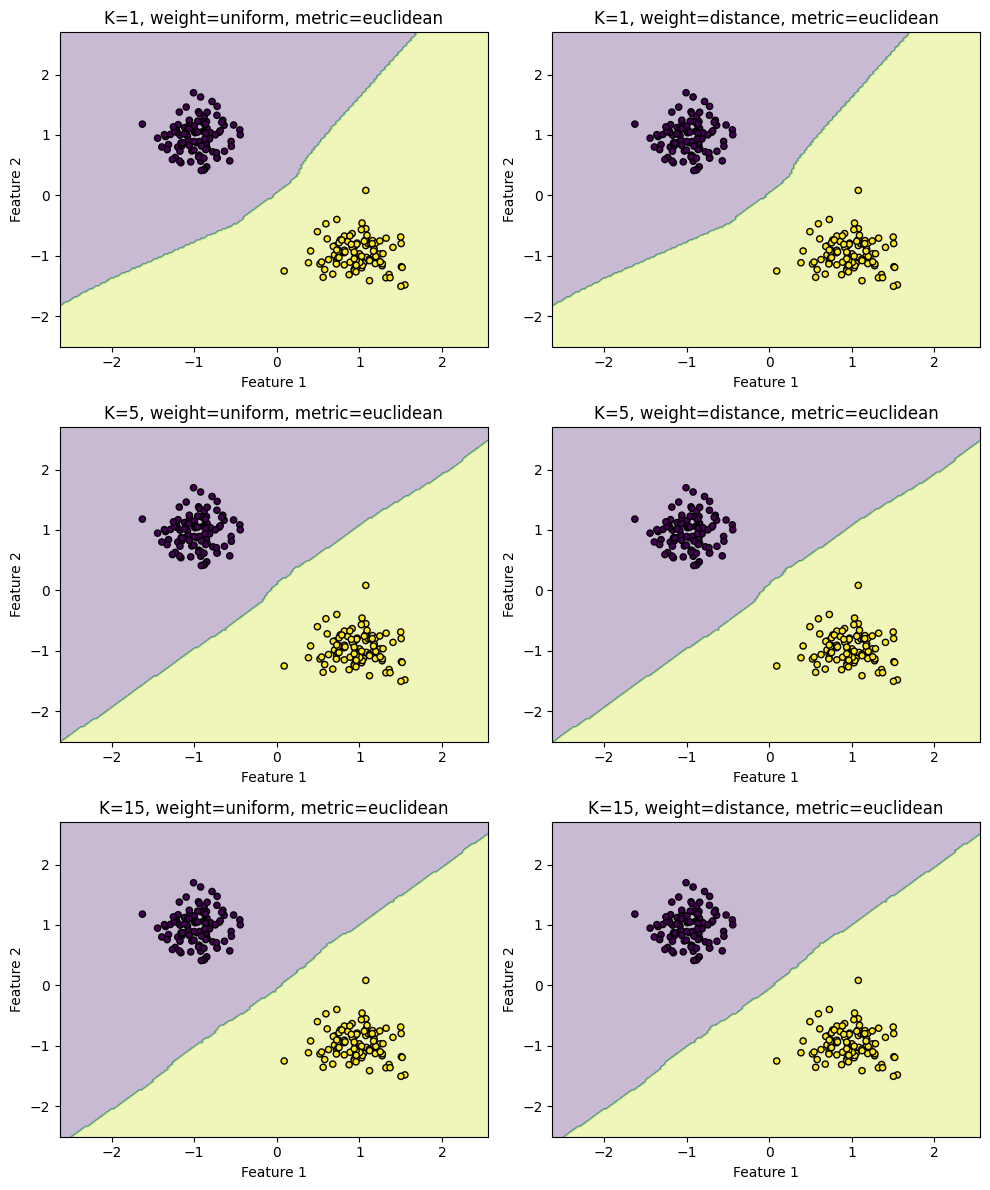

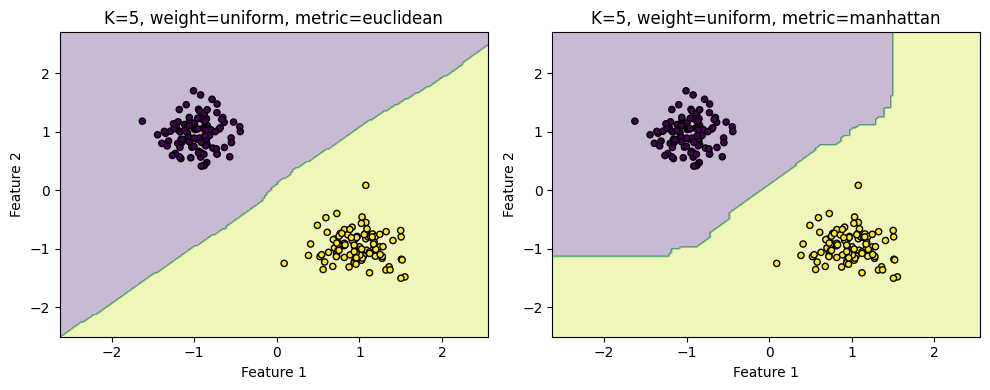

In [ ]:
### 핵심 하이퍼파라미터 예제

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 생성 및 스케일링
X, y = make_blobs(n_samples=200, centers=2, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# 2) 파라미터 설정
Ks = [1, 5, 15]
weights_opts = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']

# 3) 결정 경계 시각화 함수
def plot_knn(ax, K, weight, metric):
    knn = KNeighborsClassifier(n_neighbors=K, weights=weight, metric=metric)
    knn.fit(X_scaled, y)
    xx, yy = np.meshgrid(
        np.linspace(X_scaled[:,0].min()-1, X_scaled[:,0].max()+1, 200),
        np.linspace(X_scaled[:,1].min()-1, X_scaled[:,1].max()+1, 200)
    )
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=y, edgecolor='k', s=20)
    ax.set_title(f"K={K}, weight={weight}, metric={metric}")
    ax.set_xlabel("Feature 1"); ax.set_ylabel("Feature 2")

# 4) K & weight 비교 (euclidean)
fig, axes = plt.subplots(len(Ks), len(weights_opts), figsize=(10, 12))
for i, K in enumerate(Ks):
    for j, w in enumerate(weights_opts):
        plot_knn(axes[i,j], K=K, weight=w, metric='euclidean')
plt.tight_layout()
plt.show()

# 5) 거리 함수(metric) 비교 (K=5, uniform)
fig, axes = plt.subplots(1, len(metrics), figsize=(10, 4))
for i, m in enumerate(metrics):
    plot_knn(axes[i], K=5, weight='uniform', metric=m)
plt.tight_layout()
plt.show()


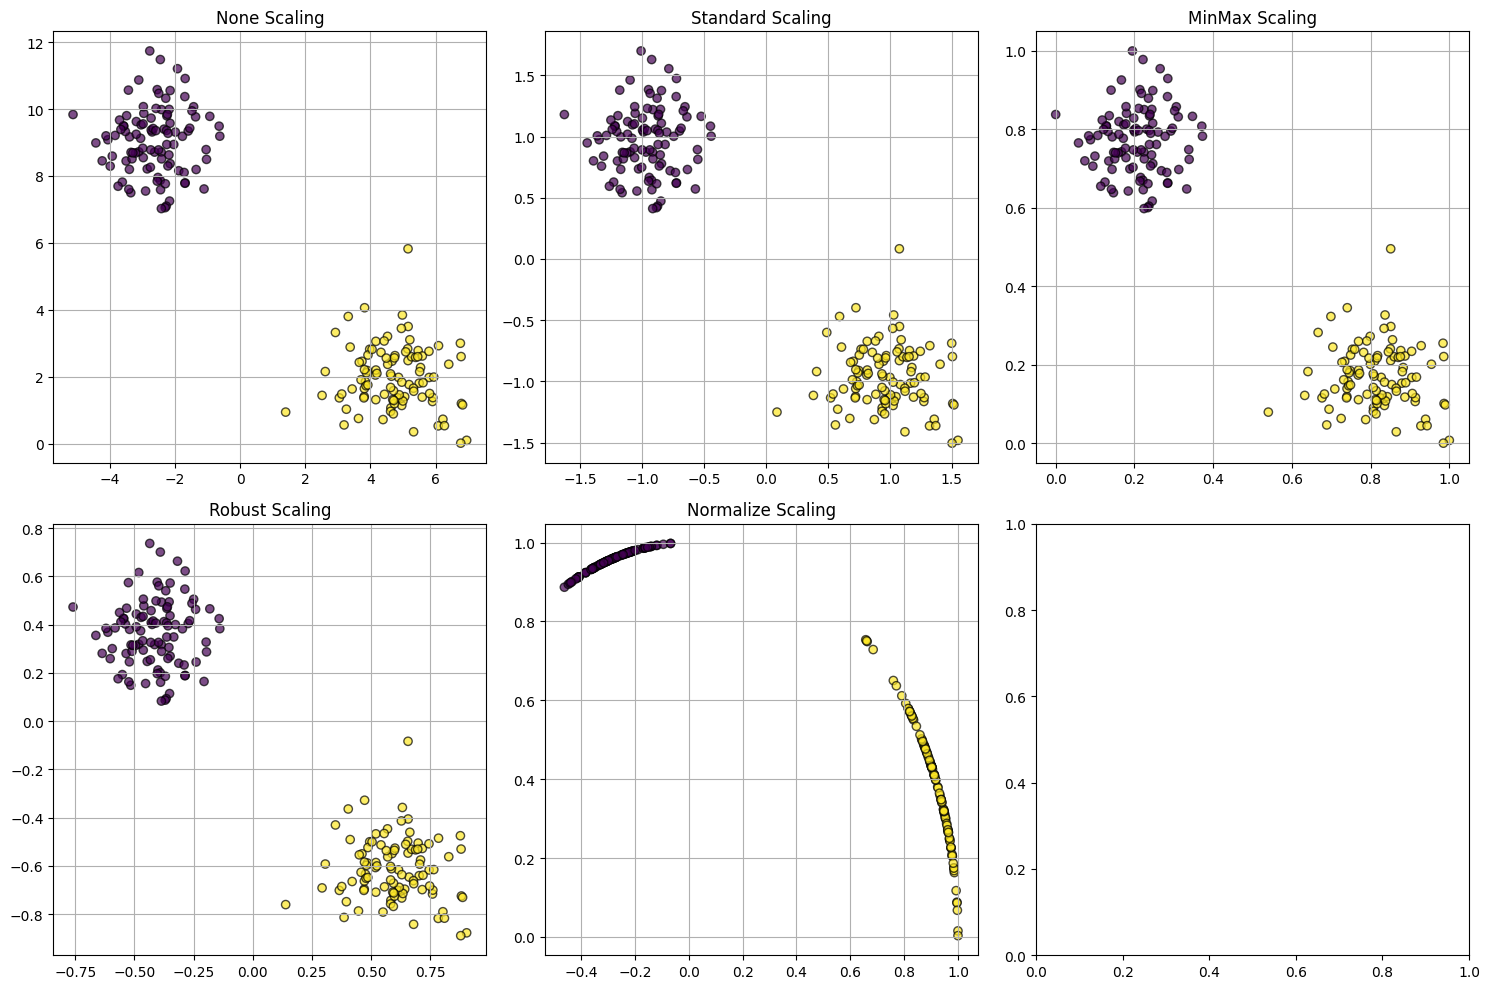

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_blobs(n_samples=200, centers=2, random_state=42)

# 스케일러들 정의
scalers = {
    'None': FunctionTransformer(lambda X: X),
    'Standard': StandardScaler(),
    'MinMax': MinMaxScaler(),
    'Robust': RobustScaler(),
    'Normalize': Normalizer()
}

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.ravel()
for ax, (name, scaler) in zip(axes, scalers.items()):
  X_scaled = scaler.fit_transform(X)
  ax.scatter(X_scaled[:,0], X_scaled[:,1], c=y, edgecolor='k', alpha=0.7)
  ax.set_title(name + " Scaling")
  ax.grid(True)
plt.tight_layout()
plt.show()

## 2. 보강 주제

1. **스케일링(Feature Scaling)**  
   - **문제**: 서로 다른 단위·범위의 특성이 있을 때, 큰 값이 거리 계산을 지배  
   - **해결**: `StandardScaler`, `MinMaxScaler` 적용  
   - **예제**: 스케일링 전·후 KNN 결정 경계 비교  

2. **차원 저주(Curse of Dimensionality)**  
   - **문제**: 차원이 늘어나면 데이터가 희박해져 “가장 가까운” 의미 상실  
   - **해결**: PCA 등 차원 축소, 중요 피처 선택  
   - **예제**: 5차원 블롭 데이터에 PCA 후 KNN 적용 비교  

3. **가중치 KNN (Weighted KNN)**  
   - **문제**: 동일 거리 KNN은 이웃 간 차이를 무시  
   - **해결**: `weights='distance'` 로 가까운 이웃에 더 큰 영향  
   - **예제**: `uniform` vs `distance` 경계 비교  

4. **파이프라인(Pipeline)**  
   - **문제**: 스케일러→모델→하이퍼파라미터 튜닝 과정 번거로움  
   - **해결**: `Pipeline([('scaler',…),('knn',…)])` 로 통합  
   - **예제**: GridSearchCV와 결합한 파이프라인



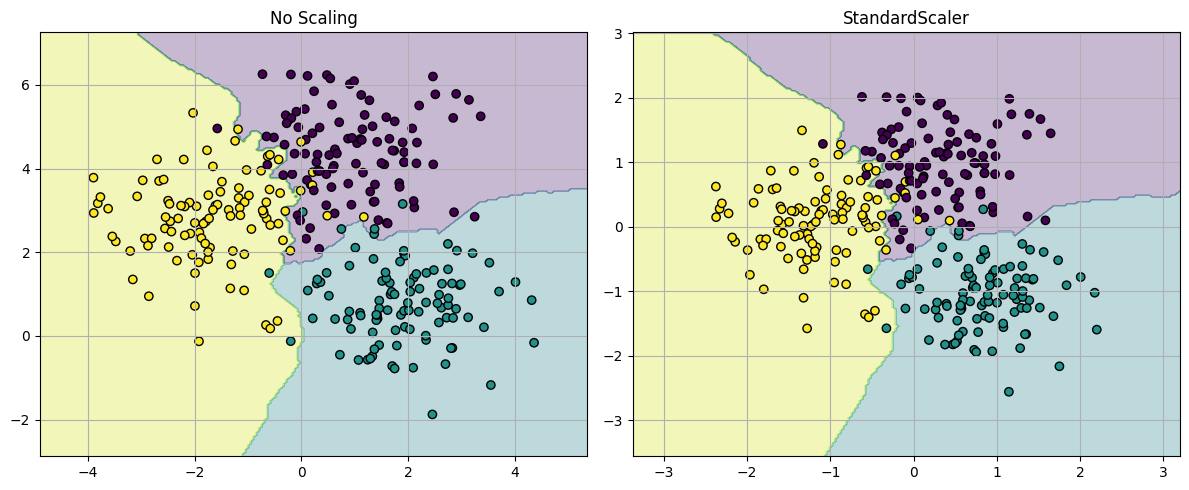

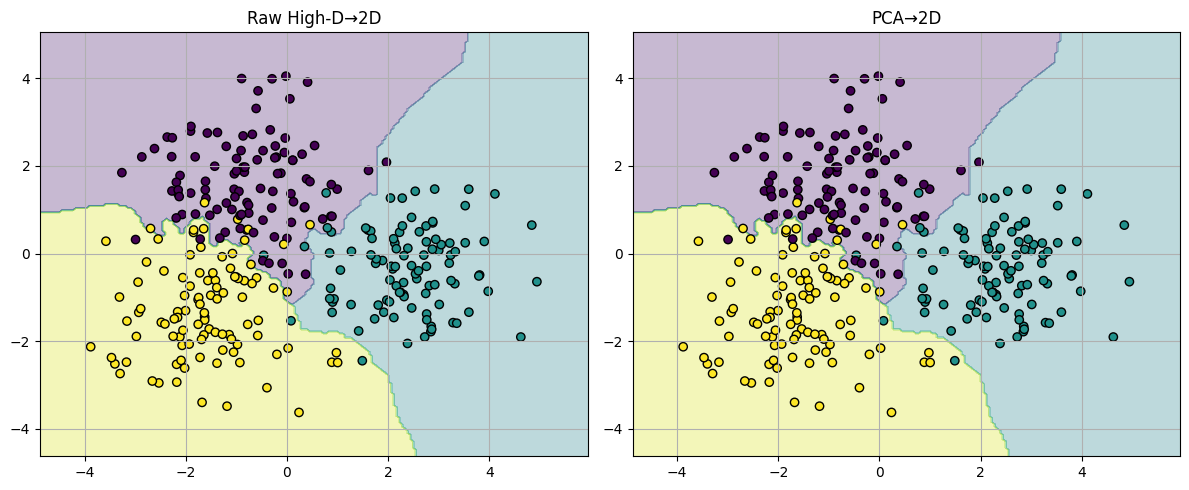

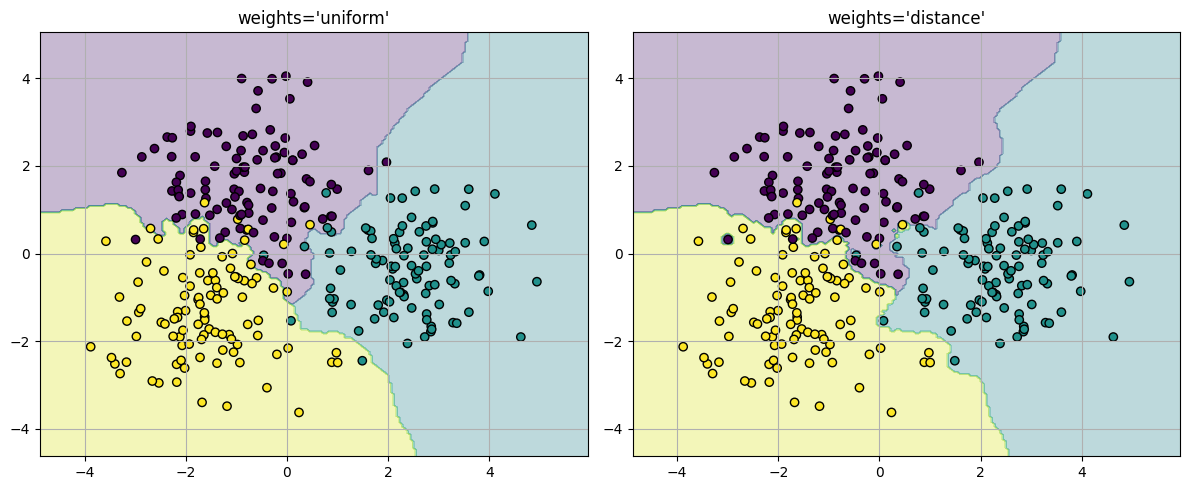

Best params: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# 공통 데이터
X, y = make_blobs(n_samples=300, centers=3, random_state=0)

# 1) 스케일링 전후 결정 경계 비교 (K=5)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, scaler, title in zip(axes,
                              [None, StandardScaler()],
                              ['No Scaling', 'StandardScaler']):
    if scaler:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_scaled, y)
    xx, yy = np.meshgrid(
        np.linspace(X_scaled[:,0].min()-1, X_scaled[:,0].max()+1, 200),
        np.linspace(X_scaled[:,1].min()-1, X_scaled[:,1].max()+1, 200)
    )
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=y, edgecolor='k')
    ax.set_title(title)
    ax.grid(True)
plt.tight_layout()
plt.show()

# 2) 차원 저주 vs PCA 축소 후 KNN (2D 시각화)
pca = PCA(n_components=2)
X2d = PCA().fit_transform(X)[:, :2]  # 임의로 2차원만 시각화
knn_raw = KNeighborsClassifier(n_neighbors=5).fit(X2d, y)
X_pca = pca.fit_transform(X)
knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_pca, y)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
for ax, Xm, title in zip(axes, [X2d, X_pca], ['Raw High-D→2D', 'PCA→2D']):
    xx, yy = np.meshgrid(
        np.linspace(Xm[:,0].min()-1, Xm[:,0].max()+1, 200),
        np.linspace(Xm[:,1].min()-1, Xm[:,1].max()+1, 200)
    )
    model = knn_raw if title=='Raw High-D→2D' else knn_pca
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(Xm[:,0], Xm[:,1], c=y, edgecolor='k')
    ax.set_title(title)
    ax.grid(True)
plt.tight_layout()
plt.show()

# 3) Weighted KNN 예제 (uniform vs distance)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for ax, weight in zip(axes, ['uniform', 'distance']):
    knn = KNeighborsClassifier(n_neighbors=5, weights=weight)
    knn.fit(X2d, y)
    xx, yy = np.meshgrid(
        np.linspace(X2d[:,0].min()-1, X2d[:,0].max()+1, 200),
        np.linspace(X2d[:,1].min()-1, X2d[:,1].max()+1, 200)
    )
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X2d[:,0], X2d[:,1], c=y, edgecolor='k')
    ax.set_title(f"weights='{weight}'")
    ax.grid(True)
plt.tight_layout()
plt.show()

# 4) Pipeline + GridSearch 예시 (코드 스니펫)
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid = {'knn__n_neighbors': [3,5,7], 'knn__weights': ['uniform','distance']}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X, y)
print("Best params:", grid.best_params_)


## 3.실습 과제

1. **스케일링 효과 분석**  
   - `None`, `StandardScaler`, `MinMaxScaler` 적용 후 KNN 정확도 및 결정 경계 비교  

2. **Weighted KNN 실험**  
   - `uniform` vs `distance` 가중치 설정에 따른 정확도 및 경계 변화 관찰  

3. **거리 함수 탐색**  
   - `euclidean` vs `manhattan` vs `minkowski(p=3)`로 결정 경계 및 성능 비교  

4. **GridSearchCV 활용**  
   - Pipeline에 스케일러+KNN 결합 후, `n_neighbors` 및 `weights`를 튜닝하여 최적 파라미터 찾기  


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# ——————————————————————
# 0) 데이터 준비
# ——————————————————————
# 2차원 blob 데이터 (기본 과제용)
X2d, y2d = make_blobs(n_samples=300, centers=3, random_state=0)

# ——————————————————————
# 1) 스케일링 효과 분석
# ——————————————————————
print("1) Scaling Effect Accuracy")
for name, scaler in [('None', None),
                     ('Standard', StandardScaler()),
                     ('MinMax', MinMaxScaler())]:
    pipe = Pipeline([
        ('scaler', scaler) if scaler else ('identity', 'passthrough'),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ])
    scores = cross_val_score(pipe, X2d, y2d, cv=5)
    print(f"  {name}: {scores.mean():.3f} ± {scores.std():.3f}")

# ——————————————————————
# 2) Weighted KNN 실험
# ——————————————————————
print("\n2 Weighted KNN Accuracy")
for weight in ['uniform', 'distance']:
    score = cross_val_score(
        KNeighborsClassifier(n_neighbors=5, weights=weight),
        X2d, y2d, cv=5
    ).mean()
    print(f"  weights='{weight}': {score:.3f}")

# ——————————————————————
# 3) 거리 함수 탐색
# ——————————————————————
print("\n3) Distance Metric Accuracy")
for metric in [('euclidean', {}), ('manhattan', {}), ('minkowski', {'p':3})]:
    name, kwargs = metric
    clf = KNeighborsClassifier(n_neighbors=5, metric=name, **kwargs)
    score = cross_val_score(clf, X2d, y2d, cv=5).mean()
    suffix = f"(p={kwargs['p']})" if 'p' in kwargs else ""
    print(f"  {name}{suffix}: {score:.3f}")

# ——————————————————————
# 4) GridSearchCV 활용
# ——————————————————————
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X2d, y2d)
print("\n4) GridSearchCV Best Params:")
print(" ", grid.best_params_)

1) Scaling Effect Accuracy
  None: 0.913 ± 0.032
  Standard: 0.910 ± 0.027
  MinMax: 0.910 ± 0.027

2 Weighted KNN Accuracy
  weights='uniform': 0.913
  weights='distance': 0.933

3) Distance Metric Accuracy
  euclidean: 0.913
  manhattan: 0.903
  minkowski(p=3): 0.913

4) GridSearchCV Best Params:
  {'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# ——————————————————————
# 0) 데이터 준비
# ——————————————————————
# 2차원 blob 데이터 (기본 과제용)
X2d, y2d = make_blobs(n_samples=300, centers=3, random_state=0)

# ——————————————————————
# 최적값 찾기
# ——————————————————————

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# 2) 탐색할 하이퍼파라미터 그리드
param_grid = {
    # 스케일러 옵션: Standard vs MinMax
    'scaler': [StandardScaler(), MinMaxScaler()],
    # KNN 이웃 개수
    'knn__n_neighbors': [3, 5, 7],
    # 가중치 방식
    'knn__weights': ['uniform', 'distance'],
    # 거리(metric) 방식
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# 3) GridSearchCV 생성
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',     # 필요에 따라 변경 가능
    n_jobs=-1
)

# 4) 학습 및 탐색
grid.fit(X2d, y2d)

# 5) 최적 결과 출력
print("\nBest Params:")
print(" 스케일러       :", grid.best_params_['scaler'])
print(" 이웃 개수      :", grid.best_params_['knn__n_neighbors'])
print(" 가중치 방식    :", grid.best_params_['knn__weights'])
print(" 거리(metric)  :", grid.best_params_['knn__metric'])
print("교차검증 최고 점수:", grid.best_score_)


Best Params:
 스케일러       : StandardScaler()
 이웃 개수      : 5
 가중치 방식    : distance
 거리(metric)  : euclidean
교차검증 최고 점수: 0.93
